## Import

In [ ]:
#Importing libs

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [ ]:
# Loading socio_eco dataset
socio_eco= pd.read_csv("socio_eco.csv", delimiter=";")

# Removing first column
socio_eco.drop(socio_eco.columns[0], axis=1,inplace=True)

In [ ]:
socio_eco.head()

,date,tx_var_emploi,idx_prix_conso,idx_conf_conso
0,31-05-2008,1.1,93.994,-36.4
1,30-06-2008,1.4,94.465,-41.8
2,31-07-2008,1.4,93.91799999999999,-42.7
3,31-08-2008,1.4,93.444,-36.1
4,30-09-2008,???,???,???


In [ ]:
# Loading data dataset
data= pd.read_csv("data.csv",delimiter=";",encoding="ISO-8859-1")

# Removing first column
data.drop(data.columns[0],axis=1,inplace=True)

In [ ]:
data.head()

,date,age,job,relation,education,defaut,balance,pret_immo,pret_perso,contact,duree_contact,nb_contact,nb_j_dernier_contact,nb_contact_derniere_campagne,resultat_derniere_campagne,statut
0,2008-05-05,58,Manager,Marié,Tertiaire,No,2143,Yes,No,NaN,261,1,-1,0,NaN,Refus
1,2008-05-05,123,Technicien,NaN,Secondaire,No,29,Yes,NaN,NaN,151,1,-1,0,NaN,Refus
2,2008-05-05,33,Entrepreuneur,Marié,Secondaire,No,2,Yes,Yes,NaN,0,1,-1,0,NaN,Absent
3,2008-05-05,47,Col bleu,Marié,NaN,No,1506,Yes,No,NaN,0,1,-1,0,NaN,Absent
4,2008-05-05,33,NaN,Célibataire,NaN,No,1,No,No,NaN,198,1,-1,0,NaN,Refus


## Preprocessing

### Treating NaN and other values in *socio_eco*

In [ ]:
#Remplacer les "???" en NaN
socio_eco.loc[socio_eco.tx_var_emploi == "???",["tx_var_emploi",	"idx_prix_conso",	"idx_conf_conso"]] = np.nan

#Remplacer les NaN par les valeurs du mois précedent
socio_eco['tx_var_emploi'] = socio_eco['tx_var_emploi'].ffill()
socio_eco['idx_prix_conso'] = socio_eco['idx_prix_conso'].ffill()
socio_eco['idx_conf_conso'] = socio_eco['idx_conf_conso'].ffill()

#Arrondir les valeurs à le 3eme décimale
socio_eco["idx_prix_conso"]=pd.to_numeric(socio_eco["idx_prix_conso"]).round(decimals = 3)

In [ ]:
socio_eco.head()

,date,tx_var_emploi,idx_prix_conso,idx_conf_conso
0,31-05-2008,1.1,93.994,-36.4
1,30-06-2008,1.4,94.465,-41.8
2,31-07-2008,1.4,93.918,-42.7
3,31-08-2008,1.4,93.444,-36.1
4,30-09-2008,1.4,93.444,-36.1


### Merge/Join the 2 datasets

In [ ]:
# Convert date format to match main dataset format
socio_eco["date"]= pd.to_datetime(socio_eco["date"], format='%d-%m-%Y')

# Convert "date" column to "aaaa-mm-jj" format
socio_eco["date"]= socio_eco['date'].dt.strftime('%Y-%m-%d')

In [ ]:
# Convert type to datetime

data["date"]=pd.to_datetime(data['date'])
socio_eco["date"]=pd.to_datetime(socio_eco["date"])

In [ ]:
#Create 3 new columns in the 2 datasets to merge them afterwards

socio_eco["Month"]=socio_eco["date"].apply(lambda x: str(x.month))
socio_eco["Year"]=socio_eco["date"].apply(lambda x: str(x.year))
socio_eco["Month_year"]=socio_eco["Month"]+"/"+socio_eco["Year"]

data["Month"]=data["date"].apply(lambda x: str(x.month))
data["Year"]=data["date"].apply(lambda x: str(x.year))
data["Month_year"]=data["Month"]+"/"+data["Year"]

In [ ]:
data=data.merge(socio_eco,how="left",on="Month_year")
data.head()

,date_x,age,job,relation,education,defaut,balance,pret_immo,pret_perso,contact,...,statut,Month_x,Year_x,Month_year,date_y,tx_var_emploi,idx_prix_conso,idx_conf_conso,Month_y,Year_y
0,2008-05-05,58,Manager,Marié,Tertiaire,No,2143,Yes,No,NaN,...,Refus,5,2008,5/2008,2008-05-31,1.1,93.994,-36.4,5,2008
1,2008-05-05,123,Technicien,NaN,Secondaire,No,29,Yes,NaN,NaN,...,Refus,5,2008,5/2008,2008-05-31,1.1,93.994,-36.4,5,2008
2,2008-05-05,33,Entrepreuneur,Marié,Secondaire,No,2,Yes,Yes,NaN,...,Absent,5,2008,5/2008,2008-05-31,1.1,93.994,-36.4,5,2008
3,2008-05-05,47,Col bleu,Marié,NaN,No,1506,Yes,No,NaN,...,Absent,5,2008,5/2008,2008-05-31,1.1,93.994,-36.4,5,2008
4,2008-05-05,33,NaN,Célibataire,NaN,No,1,No,No,NaN,...,Refus,5,2008,5/2008,2008-05-31,1.1,93.994,-36.4,5,2008


In [ ]:
#Rename columns affected by the merge ("_x" or "_y")

data["date"]=data["date_x"]
data["Month"]=data["Month_x"]
data["Year"]=data["Year_y"]

data.drop(["date_x","Month_x","Year_y","date_y","Month_y","Year_x"],axis=1,inplace=True)

data['Month_year'] = pd.to_datetime(data['Month_year'], format='%m/%Y')

### Treating NaN and other values in *data*

In [ ]:
#Display all unique values

# for col in data.columns:
#   print("\n",col,": ",data[col].unique())

In [ ]:
# Remove lines where age exceeds 120 years

data.drop(data[data.age >= 120].index, inplace=True)

In [ ]:
data.age.unique()

array([58, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32, 25,
       40, 44, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 24, 38, 31, 30, 27,
       34, 23, 48, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [ ]:
# This column will not help us answer our question

data.drop("contact", axis = 1, inplace=True)

In [ ]:
# To find the ideal customer who subscribes the most, it's not useful to know why they refuse.

data.loc[data['statut'] != 'Souscrit', 'statut'] = 'Refus'

In [ ]:
# Same for the results of the last marketing campaign

data.loc[data['resultat_derniere_campagne'] != 'Succes', 'resultat_derniere_campagne'] = 'Non Succes'

In [ ]:
data["job"].unique()

array(['Manager', 'Entrepreuneur', 'Col bleu', nan, 'Technicien', 'Admin',
       'Services', 'Retraité   ', 'Retraité', 'Manager   ',
       'Technicien  ', 'Admin  ', 'Indépendant', 'Admin   ', 'Chomeur',
       'Employé de ménage', 'Etudiant', 'Entrepreuneur ', 'Services   ',
       'Technicien   ', 'Col bleu   ', 'Technicien ', 'Col bleu  ',
       'Admin ', 'Services  ', 'Entrepreuneur  ', 'Etudiant   ',
       'Col bleu ', 'Etudiant ', 'Chomeur  ', 'Employé de ménage  ',
       'Chomeur ', 'Retraité ', 'Services ', 'Chomeur   ', 'Manager  ',
       'Employé de ménage   ', 'Entrepreuneur   ', 'Indépendant ',
       'Retraité  ', 'Indépendant   ', 'Manager ', 'Etudiant  ',
       'Indépendant  ', 'Employé de ménage '], dtype=object)

In [ ]:
#Remove unnecessary spaces

data["job"] = data["job"].str.replace(' ', '')

data["job"] = data["job"].str.replace('Employédeménage', 'Emp_de_menage')
data["job"] = data["job"].str.replace('Colbleu', 'Col_bleu')

data["job"].unique()

array(['Manager', 'Entrepreuneur', 'Col_bleu', nan, 'Technicien', 'Admin',
       'Services', 'Retraité', 'Indépendant', 'Chomeur', 'Emp_de_menage',
       'Etudiant'], dtype=object)

In [ ]:
data["education"].unique()

array(['Tertiaire', 'Secondaire', nan, 'Primaire', 'Tertiaire   ',
       'Secondaire  ', 'Tertiaire  ', 'Tertiaire ', 'Primaire ',
       'Secondaire ', 'Primaire  ', 'Primaire   ', 'Secondaire   '],
      dtype=object)

In [ ]:
data["education"] = data["education"].str.replace(' ', '')

data["education"].unique()

array(['Tertiaire', 'Secondaire', nan, 'Primaire'], dtype=object)

In [ ]:
#Check NaN location and quantity

data.isnull().sum()

age                                0
job                              273
relation                           0
education                       1767
defaut                             0
balance                            0
pret_immo                          0
pret_perso                         0
duree_contact                      0
nb_contact                         0
nb_j_dernier_contact               0
nb_contact_derniere_campagne       0
resultat_derniere_campagne         0
statut                             0
Month_year                         0
tx_var_emploi                      0
idx_prix_conso                     0
idx_conf_conso                     0
date                               0
Month                              0
Year                               0
dtype: int64

In [ ]:
# Replace with the most recurrent cat or a new default one?

data["job"].value_counts()

Col_bleu         9370
Manager          9042
Technicien       7257
Admin            4968
Services         3980
Retraité         2144
Indépendant      1519
Entrepreuneur    1434
Chomeur          1252
Emp_de_menage    1196
Etudiant          895
Name: job, dtype: int64

In [ ]:
#Categories are well distributed in this column, so I'll create a new one

data["job"].fillna("Autre",inplace=True)

In [ ]:
data["relation"].value_counts()

Marié          26089
Célibataire    12273
Divorcé         4968
Name: relation, dtype: int64

In [ ]:
data["education"].value_counts()

Secondaire    22246
Tertiaire     12718
Primaire       6599
Name: education, dtype: int64

In [ ]:
data["pret_perso"].value_counts()

No     36377
Yes     6953
Name: pret_perso, dtype: int64

In [ ]:
#In view of the distributions, here we replace by the most recurrent category.

Mode_Category = data["relation"].mode()[0]
data["relation"].fillna(Mode_Category,inplace=True)

Mode_Category = data["education"].mode()[0]
data["education"].fillna(Mode_Category,inplace=True)

Mode_Category = data["pret_perso"].mode()[0]
data["pret_perso"].fillna(Mode_Category,inplace=True)

In [ ]:
#Check for remaining NaN

data.isnull().sum()

age                             0
job                             0
relation                        0
education                       0
defaut                          0
balance                         0
pret_immo                       0
pret_perso                      0
duree_contact                   0
nb_contact                      0
nb_j_dernier_contact            0
nb_contact_derniere_campagne    0
resultat_derniere_campagne      0
statut                          0
Month_year                      0
tx_var_emploi                   0
idx_prix_conso                  0
idx_conf_conso                  0
date                            0
Month                           0
Year                            0
dtype: int64

Problem found: Determine the ideal customer. What is the profile of the customer most likely to subscribe to the product?

## Data visualization

### Value distributions for each column

In [ ]:
#For Powerpoint presentation

#data["age"].value_counts().to_excel("age_ditrib.xlsx")

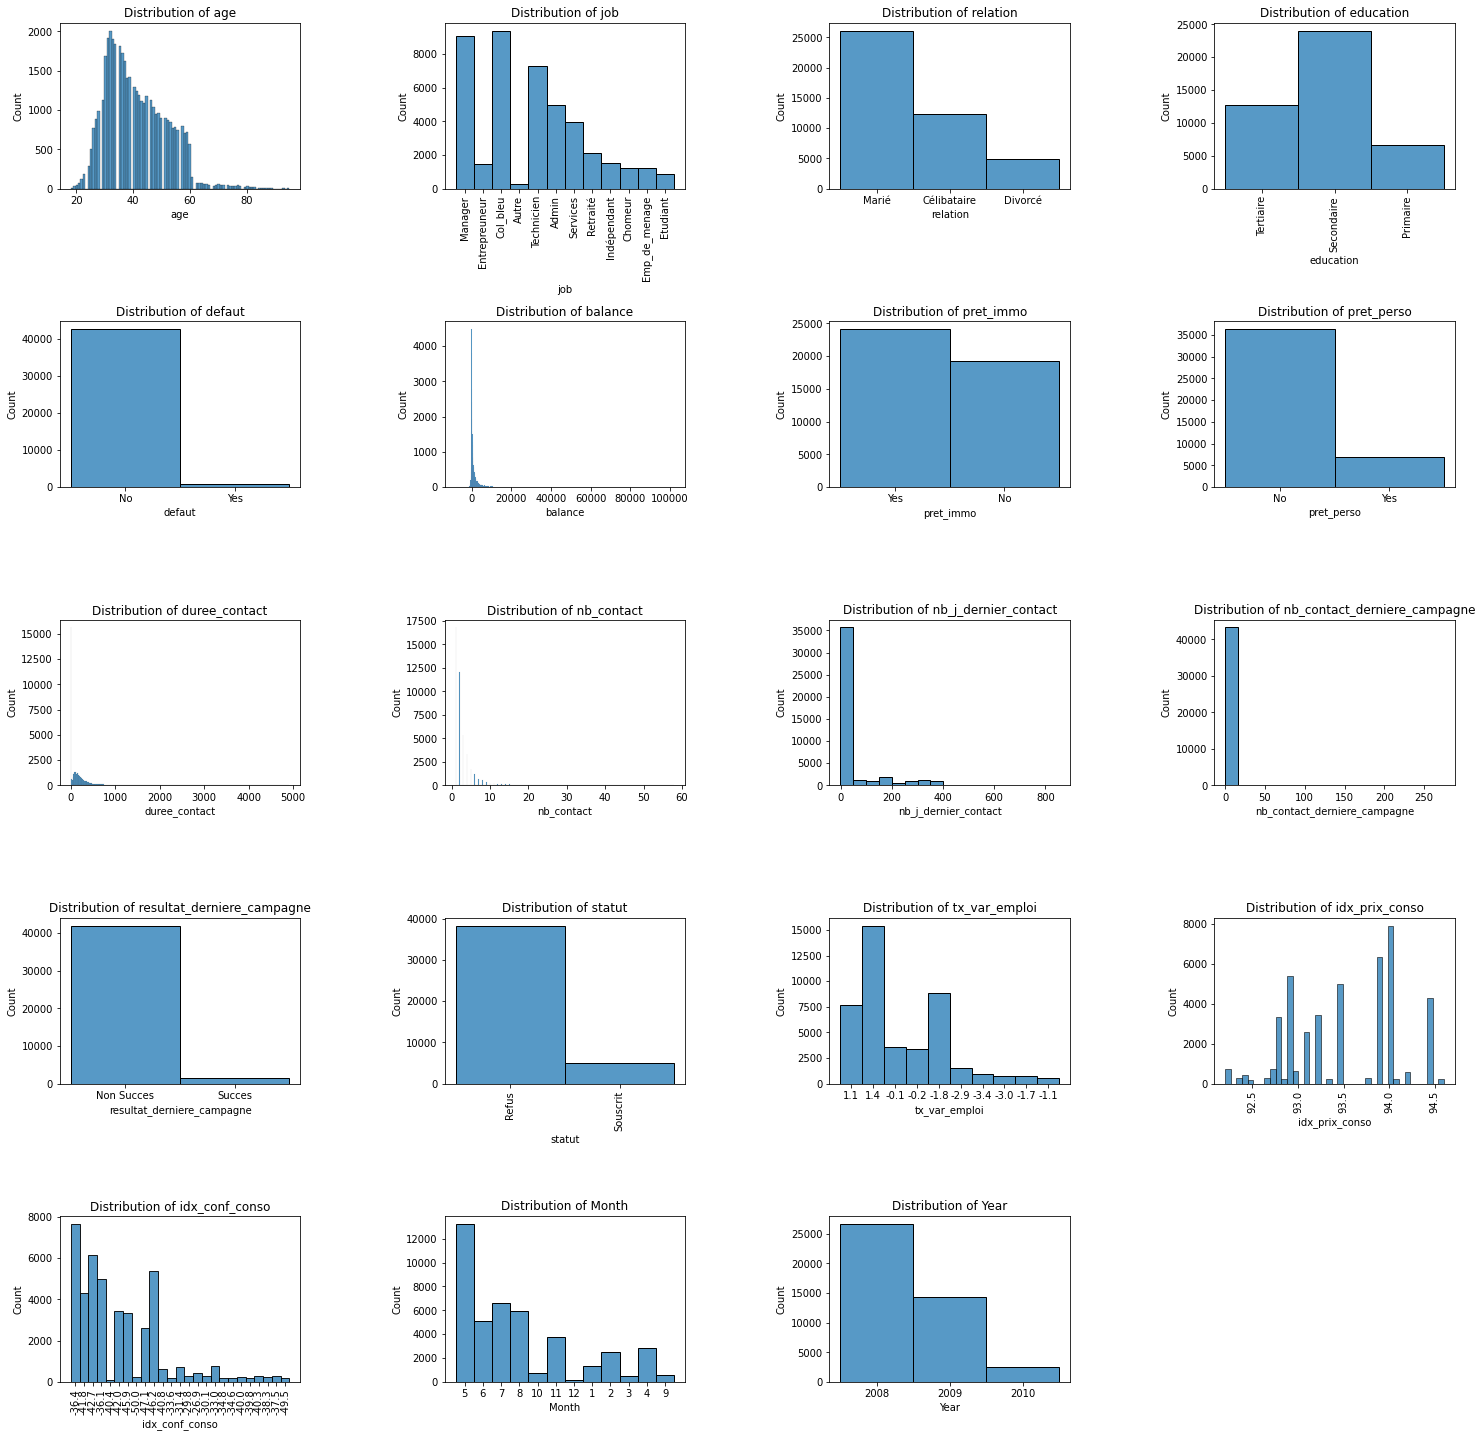

In [ ]:
cols=data.columns.drop(["Month_year","date"])

fig = plt.figure(figsize=(25, 25))
for i, col in enumerate(cols):
  #print(i)
    if i==20:
      break

    else:
      plt.subplot(5, 4, i+1)

      fig.subplots_adjust(hspace=0.8,wspace=0.6)

      sns.histplot(x=col, data=data).set(title=f"Distribution of {col}")

      if i in [1,3,13,15,16,19]:
        plt.xticks(rotation=90) 

plt.show()

### Age representation of the survey population

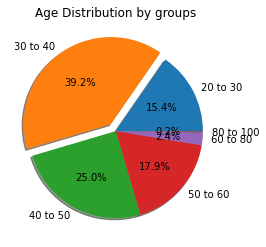

In [ ]:
bins = [20, 30, 40, 50,60,80,100]
labels = ['20 to 30', '30 to 40','40 to 50','50 to 60', '60 to 80', '80 to 100'] #Création de tranches d'âges

data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

tot_age_counts = data.groupby('age_group')['date'].count()#Compte le nombre d'individus pour chaque tranche d'âge

explode = (0, 0.1, 0, 0,0,0)

fig, ax = plt.subplots()
plt.pie(tot_age_counts, explode=explode,labels=labels ,autopct='%1.1f%%', shadow=True)
ax.set_title('Age Distribution by groups')
plt.show()

In [ ]:
data.to_csv("data_cleaned.csv",index=False)

### Which segment subscribes most to the product?

In [ ]:
souscrit= data[data['statut'] == 'Souscrit']

age_counts_sub = souscrit.groupby('age_group')['statut'].count()

#age_counts_sub.sort_values(ascending=False)

In [ ]:
#tot_age_counts.sort_values(ascending=False)

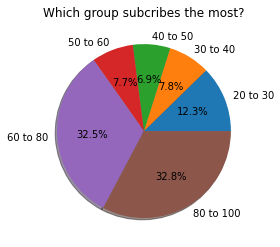

In [ ]:
absolute_age_counts_sub=(age_counts_sub/tot_age_counts)*100

fig, ax = plt.subplots()
plt.pie(absolute_age_counts_sub, labels=labels ,autopct='%1.1f%%', shadow=True)
ax.set_title('Which group subcribes the most?')

plt.show()

In [ ]:
#For Powerpoint presentation
#absolute_age_counts_sub.to_excel("age_group.xlsx")

People between 60 and 100 subscribe to the product the most.

### What do these people do?

In [ ]:
souscrit_60_100=souscrit[(souscrit['age_group'] == '60 to 80') | (souscrit['age_group'] == '80 to 100')]

In [ ]:
souscrit_60_100.groupby('job')['age_group'].count().sort_values(ascending=False)

job
Retraité         352
Manager           47
Emp_de_menage     21
Indépendant       17
Admin             11
Technicien        10
Col_bleu           7
Entrepreuneur      6
Autre              3
Chomeur            3
Name: age_group, dtype: int64

In [ ]:
#For Powerpoint presentation

#souscrit_60_100.count().sort_values(ascending=False).to_excel("jobs_60_to_100.xlsx")

People between 60 and 100 are mainly retirees, if not managers.

In [ ]:
#the people with the biggest balance
#data.nlargest(50, 'balance')

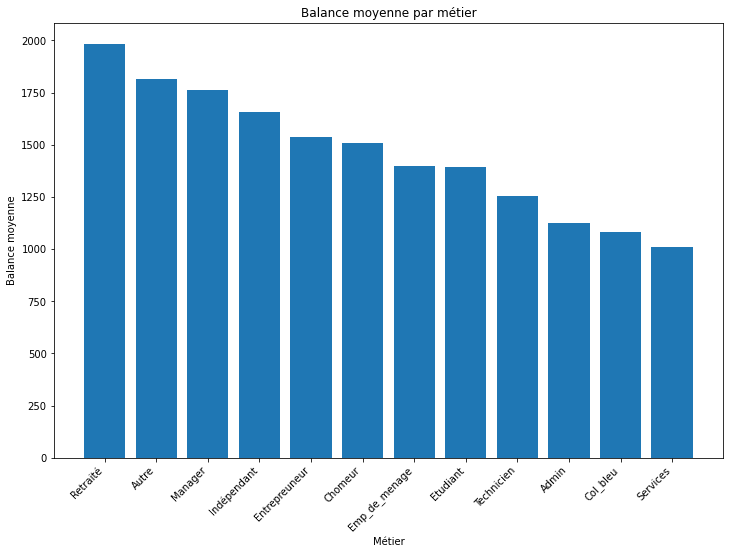

In [ ]:
# Calculate the average balance for each loom
balances_par_metier = data.groupby('job')['balance'].mean()

# Sort
balances_par_metier = balances_par_metier.sort_values(ascending=False)

plt.figure(figsize=(12,8))
plt.bar(balances_par_metier.index, balances_par_metier.values)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Métier')
plt.ylabel('Balance moyenne')
plt.title('Balance moyenne par métier')
plt.show()

In [ ]:
#For Powerpoint presentation
#balances_par_metier.to_excel("balance_avg_job.xlsx")

Occupation of product subscribers This group is the richest, as they are either retired or managers, the 2 categories at the top of this graph.

### Profil 

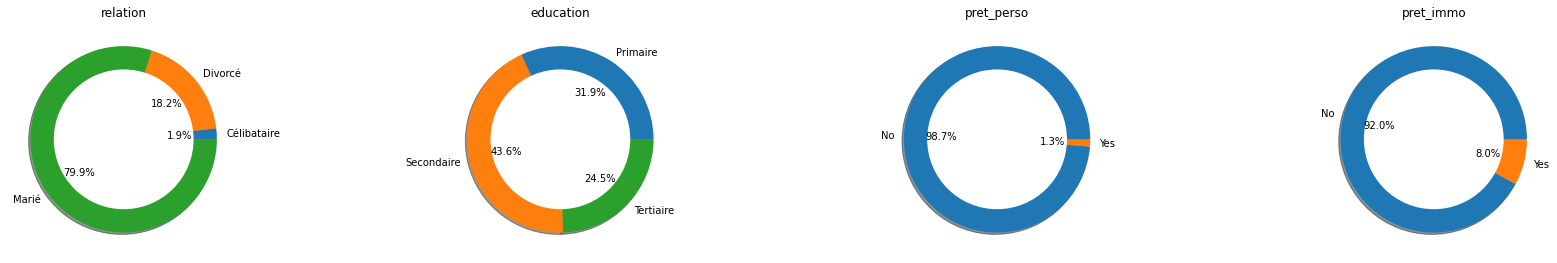

In [ ]:
cols_sub=["relation","education","pret_perso","pret_immo"] #Colonnes à plot

fig, ax = plt.subplots(figsize=(30, 30))

for i, col in enumerate(cols_sub):

  plt.subplot(5, 4, i+1)

  fig.subplots_adjust(hspace=0.5)
  
  counts_cols_sub = souscrit_60_100.groupby(col)['date'].count()
  
  #Pour Powerpoint
  #counts_cols_sub.to_excel(col+"_souscrit_60_100_profil.xlsx")

  plt.pie(counts_cols_sub,labels=counts_cols_sub.index, autopct='%1.1f%%', shadow=True)
  #ax.set_title("sfsd",fontsize=20)
  circle=plt.Circle(xy=(0,0),radius=.75,facecolor="white")
  plt.gca().add_artist(circle)
  
  plt.title(col)

plt.show()

The ideal customer is between 60 and 100 years old, retired or a manager, married, with no personal loans or mortgages.

### Time series


In [ ]:
#Number of subscriptions per month
subscribers_per_month = data[data['statut'] == 'Souscrit'].groupby(['Month_year'])['statut'].count()

In [ ]:
#subscribers_per_month

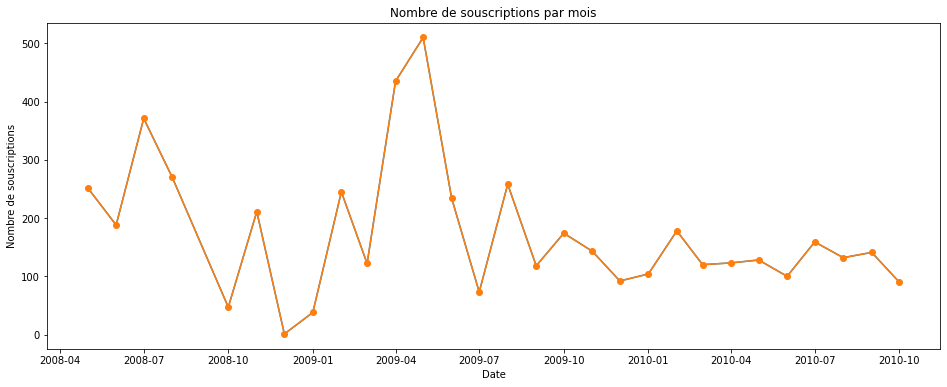

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.lineplot(data=subscribers_per_month, x=subscribers_per_month.index, y=subscribers_per_month.values)

ax.plot(subscribers_per_month.index, subscribers_per_month.values, '-o')
ax.set_xlabel('Date')
ax.set_ylabel('Nombre de souscriptions')
ax.set_title('Nombre de souscriptions par mois')
plt.show()

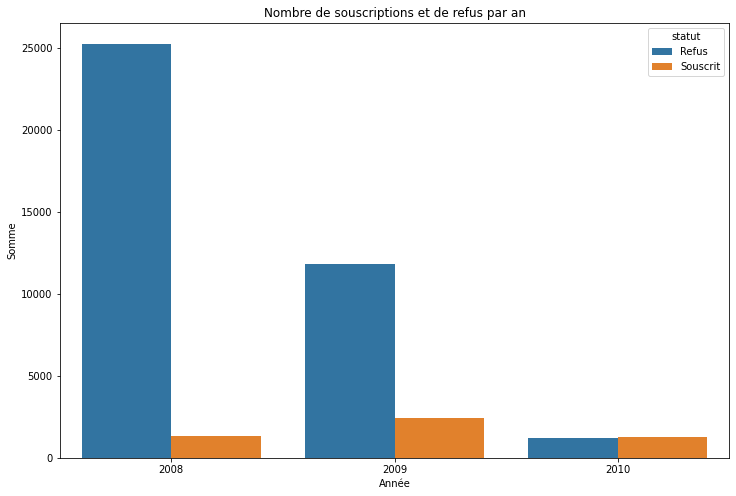

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.countplot(data=data, x="Year", hue="statut")

ax.set_xlabel('Année')
ax.set_ylabel('Somme')
ax.set_title('Nombre de souscriptions et de refus par an')
plt.show()

## Machine Learning

### Imports

In [ ]:
#Importing libs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import mutual_info_regression

#!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import recall_score,confusion_matrix,f1_score,accuracy_score,precision_score

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import make_scorer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### Creation X and y

In [ ]:
#Remove irrelevant columns
X=data.drop(["date","Month_year","statut","duree_contact"],axis=1)

#Converting 2-class columns to binary
X['defaut'] = data['defaut'].map({'Yes': 1, 'No': 0})
X['pret_immo'] = data['pret_immo'].map({'Yes': 1, 'No': 0})
X['pret_perso'] = data['pret_perso'].map({'Yes': 1, 'No': 0})
X["resultat_derniere_campagne"]=X["resultat_derniere_campagne"].map({'Non Succes': '0', 'Succes': '1'})

In [ ]:
#One Hot encoding for the other categorical cols
X=pd.get_dummies(X,columns=["job","relation","education","age_group"])
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43330 entries, 0 to 45135
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           43330 non-null  int64  
 1   defaut                        43330 non-null  int64  
 2   balance                       43330 non-null  int64  
 3   pret_immo                     43330 non-null  int64  
 4   pret_perso                    43330 non-null  int64  
 5   nb_contact                    43330 non-null  int64  
 6   nb_j_dernier_contact          43330 non-null  int64  
 7   nb_contact_derniere_campagne  43330 non-null  int64  
 8   resultat_derniere_campagne    43330 non-null  object 
 9   tx_var_emploi                 43330 non-null  object 
 10  idx_prix_conso                43330 non-null  float64
 11  idx_conf_conso                43330 non-null  object 
 12  Month                         43330 non-null  object 
 13  Y

In [ ]:
#The target variable is "status", which is also converted to binary.
y= data["statut"].replace({'Refus': '0', 'Souscrit': '1'}, regex=True)

In [ ]:
#Distribution of classes to predict
y.value_counts()

0    38273
1     5057
Name: statut, dtype: int64

### Treating Class imbalance

In [ ]:
# Over and Undersample to restore class balance
oversample=SMOTE()
undersample=RandomUnderSampler()
steps=[["o",oversample],["u",undersample]]
pipeline=Pipeline(steps=steps)

X,y=pipeline.fit_resample(X,y)

In [ ]:
y.value_counts()

0    38273
1    38273
Name: statut, dtype: int64

### Feature selection

In [ ]:
#MI score shows the importance of each variable/ how well it explains the target variable
mi_scores = mutual_info_regression(X, y, random_state=1)
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
#mi_scores

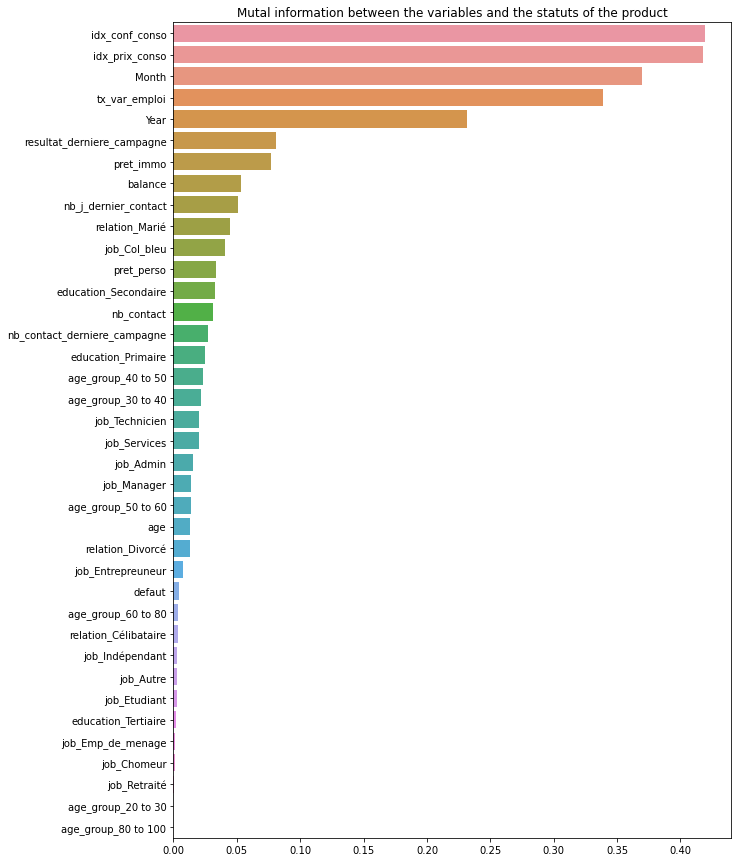

In [ ]:
plt.figure(figsize = (10, 15))
sns.barplot(y=mi_scores.index,x=mi_scores.values).set(title="Mutal information between the variables and the statuts of the product")
plt.show()

In [ ]:
#For Powerpoint presentation
#mi_scores.to_excel("mi_score.xlsx")

In [ ]:
#Heatmap
# plt.figure(figsize=(30, 12))
# sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True).set(title='Correlation Heatmap')
# plt.show()

### Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
#Converting types

X_train["resultat_derniere_campagne"]=X_train["resultat_derniere_campagne"].astype(int)
X_train["tx_var_emploi"]=X_train["tx_var_emploi"].astype(float)
X_train["idx_prix_conso"]=X_train["idx_prix_conso"].astype(float)
X_train["idx_conf_conso"]=X_train["idx_conf_conso"].astype(float)
X_train["Month"]=X_train["Month"].astype(int)
X_train["Year"]=X_train["Year"].astype(int)

X_test["resultat_derniere_campagne"]=X_test["resultat_derniere_campagne"].astype(int)
X_test["tx_var_emploi"]=X_test["tx_var_emploi"].astype(float)
X_test["idx_prix_conso"]=X_test["idx_prix_conso"].astype(float)
X_test["idx_conf_conso"]=X_test["idx_conf_conso"].astype(float)
X_test["Month"]=X_test["Month"].astype(int)
X_test["Year"]=X_test["Year"].astype(int)

### Data scaling

In [ ]:
min_max_scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(min_max_scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(min_max_scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

### Models

In [ ]:
def model_report(y_true,y_pred):
  print("Accuracy:", accuracy_score(y_test,y_pred))
  print("Precision:", precision_score(y_test,y_pred ,pos_label='1',average='binary'))
  print("Recall:", recall_score(y_test,y_pred ,pos_label='1',average='binary'))
  print("F1 score:", f1_score(y_test,y_pred ,pos_label='1',average='binary'))

#### Logistic Regression

In [ ]:
reg = LogisticRegression().fit(X_train_scaled, y_train)

Accuracy: 0.922453885143962
Precision: 0.9634639842756388
Recall: 0.8770655720450479
F1 score: 0.9182369146005509


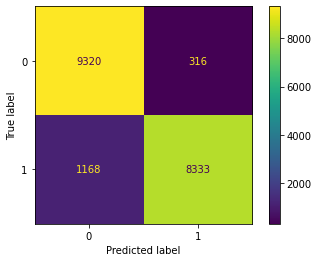

In [ ]:
predictions=reg.predict(X_test_scaled)

cm = confusion_matrix(y_test, predictions)

model_report(y_test,predictions)

ConfusionMatrixDisplay.from_predictions(y_test, predictions)
plt.show()

#### Random Forest Classifier

In [ ]:
random_forest = RandomForestClassifier().fit(X_train_scaled, y_train)

Accuracy: 0.9344202330563829
Precision: 0.9512915936952715
Recall: 0.9147458162298705
F1 score: 0.9326608359714547


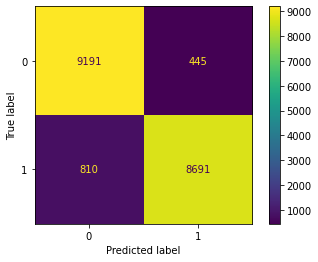

In [ ]:
predictions=random_forest.predict(X_test_scaled)

cm = confusion_matrix(y_test, predictions)

model_report(y_test,predictions)

ConfusionMatrixDisplay.from_predictions(y_test, predictions)
plt.show()

##### Feature importance

In [ ]:
importances = random_forest.feature_importances_

forest_importances = pd.Series(importances, index=X_train_scaled.columns)

std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)

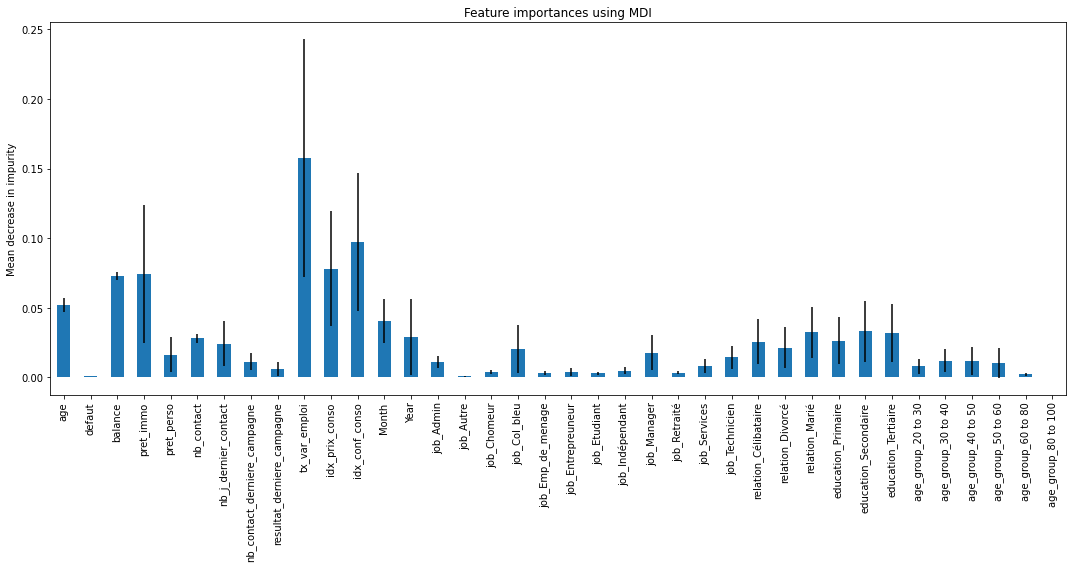

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))

forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### Grid search to optimize Random Forest parameters

In [ ]:
# grid_values = {
#     "n_estimators": [200,300,500,800],
#     'max_features': ['auto', 'sqrt', 'log2'], 
#     'max_depth': [4, 5, 6, 7, 8], 
#     'criterion': ['gini', 'entropy']
#     }

# recall = make_scorer(recall_score , pos_label='1', average='binary')

# grid = GridSearchCV(random_forest, param_grid = grid_values,cv=3,verbose=2,n_jobs=4, scoring = recall)
# grid.fit(X_train, y_train)

In [ ]:
#grid.best_score_

#### XGBoost Classifier

In [ ]:
xgbc = XGBClassifier().fit(X_train, y_train)

Accuracy: 0.9020222605424048
Precision: 0.98290273556231
Recall: 0.8168613830123145
F1 score: 0.8922227970339713


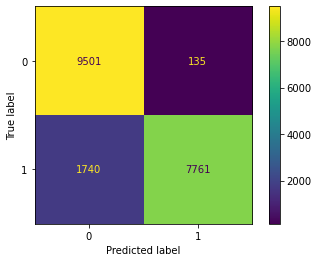

In [ ]:
predictions=xgbc.predict(X_test_scaled)

cm = confusion_matrix(y_test, predictions)

model_report(y_test,predictions)

ConfusionMatrixDisplay.from_predictions(y_test, predictions)
plt.show()

#### Grid search to optimize XGBoost Classifier parameters

In [ ]:
# grid_values={'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

# recall = make_scorer(recall_score , pos_label='1', average='binary')

# grid = GridSearchCV(xgbc, param_grid = grid_values, scoring = recall)
# grid.fit(X_train, y_train)

In [ ]:
#grid.best_score_

## Areas for improvement

* Continue analysis 

* Optimize model parameters

* Experiment with other models 

* Add other metrics to evaluate models (Percision-Recall Curve)